# Tugas Besar Pembelajaran Mesin

Muhammad Rizky Irsyad - 1301180347 - IF-42-08

## 1. Evaluasi Masalah
Berdasarkan dataset yang telah diberikan, Goals atau tujuan akhir dari tugas ini adalah untuk mengelompokkan data yang diberikan ke berbagai cluster data.

## 2. Data Preprocessing
Langkah pertama yang dapat kita lakukan adalah import library-library yang dibutuhkan untuk mengolah data dan fungsi yang membantu untuk membangun model

In [1]:
import numpy as np
import pandas as pd
import copy
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Selanjutnya kita mulai untuk membersihkan data

In [2]:
df = pd.read_csv('kendaraan_train-Copy1.csv')
df.head()

id Jenis_Kelamin  Umur  ...  Kanal_Penjualan  Lama_Berlangganan  Tertarik
0   1        Wanita  30.0  ...            152.0               97.0         0
1   2          Pria  48.0  ...             29.0              158.0         0
2   3           NaN  21.0  ...            160.0              119.0         0
3   4        Wanita  58.0  ...            124.0               63.0         0
4   5          Pria  50.0  ...             88.0              194.0         0

[5 rows x 12 columns]

Selanjutnya kita mulai dengan mencari missing value pada dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


Bisa dilihat kalau terdapat banyak baris yang tidak memiliki data, kita akan drop baris-baris tersebut. Sebenarnya, ada cara lain untuk mengatasi missing value pada suatu dataset, Namun disini saya memilih untuk drop baris karena data yang cukup banyak.

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171068 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 171068 non-null  int64  
 1   Jenis_Kelamin      171068 non-null  object 
 2   Umur               171068 non-null  float64
 3   SIM                171068 non-null  float64
 4   Kode_Daerah        171068 non-null  float64
 5   Sudah_Asuransi     171068 non-null  float64
 6   Umur_Kendaraan     171068 non-null  object 
 7   Kendaraan_Rusak    171068 non-null  object 
 8   Premi              171068 non-null  float64
 9   Kanal_Penjualan    171068 non-null  float64
 10  Lama_Berlangganan  171068 non-null  float64
 11  Tertarik           171068 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 17.0+ MB


Selanjutnya kita mulai dengan drop Label "Tertarik", karena tujuan dari algoritma k-means adalah untuk clustering data bukan untuk prediksi suatu label. Namun, disini kita akan melakukannya dengan df2 agar tetap menjaga originalitas data yang belum dimodifikasi

In [5]:
df2 = copy.deepcopy(df)
#kita akan melakukan drop label "Tertarik" pada df2
df2.drop(columns="Tertarik", axis=1, inplace=True)
df2.set_index("id")
df2.head()

id Jenis_Kelamin  Umur  ...    Premi  Kanal_Penjualan  Lama_Berlangganan
0   1        Wanita  30.0  ...  28029.0            152.0               97.0
1   2          Pria  48.0  ...  25800.0             29.0              158.0
3   4        Wanita  58.0  ...   2630.0            124.0               63.0
5   6          Pria  21.0  ...  22735.0            152.0              171.0
8   9        Wanita  20.0  ...  30786.0            160.0               31.0

[5 rows x 11 columns]

DIsini kita akan melakukan hot encoding untuk mengubah nilai-nilai kategorikal menjadi numerik. Karena, K-means hanya bisa mengolah data numerik. Algoritma yang saya pakai adalah <b>OrdinalEncoder</b> pada library sklearn. Namun, untuk kategori "Umur_Kendaraan" & "Kendaraan Rusak" saya menggunakan konsep yang sama tapi menggunakan fitur replace() dari library panda, agar saya dapat menentukan nilai ordinalnya sendiri.

In [6]:
#Definsikan variabel encoder
encoder = OrdinalEncoder()

#Ubah Kendaraan Rusak
replaces_data = {"Kendaraan_Rusak": {"Pernah": 1, "Tidak": 0}}
df2.replace(replaces_data, inplace=True)

#Ubah Jenis Kelamin
df2["Gender"] = encoder.fit_transform(df2[["Jenis_Kelamin"]]) #Library ini auto encode untuk perempuan bernilai 1 dan laki laki 0
df2["Jenis_Kelamin"] = df2["Gender"]
df2.drop(columns="Gender", axis=1, inplace=True)

#Ubah Umur Kendaraan
replaces_data = {"Umur_Kendaraan": {"1-2 Tahun": 1, "< 1 Tahun": 0, "> 2 Tahun": 2}}
df2.replace(replaces_data, inplace=True)
df2.head()

id  Jenis_Kelamin  Umur  ...    Premi  Kanal_Penjualan  Lama_Berlangganan
0   1            1.0  30.0  ...  28029.0            152.0               97.0
1   2            0.0  48.0  ...  25800.0             29.0              158.0
3   4            1.0  58.0  ...   2630.0            124.0               63.0
5   6            0.0  21.0  ...  22735.0            152.0              171.0
8   9            1.0  20.0  ...  30786.0            160.0               31.0

[5 rows x 11 columns]

Pada Tahap ini, saya akan melakukan normalisasi data menggunakan <b>MinMaxScaler</b> dari library sklearn. Lalu, saya akan mengubah dataframe ke bentuk PCA selain untuk mempermudah penghitungan dengan mengurangi kompleksitas dimensi, juga untuk mempermudah visualisasi nantinya.

In [7]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df2)
df2.loc[:,:] = scaled_values
df2.head()

id  Jenis_Kelamin  ...  Kanal_Penjualan  Lama_Berlangganan
0  0.000000            1.0  ...         0.932099           0.301038
1  0.000003            0.0  ...         0.172840           0.512111
3  0.000010            1.0  ...         0.759259           0.183391
5  0.000017            0.0  ...         0.932099           0.557093
8  0.000028            1.0  ...         0.981481           0.072664

[5 rows x 11 columns]

In [8]:
pca = PCA(2) #membuat PCA 2 fitur
df2 = pca.fit_transform(df2)
df2

array([[-0.90701509,  0.41921736],
       [ 0.97762619, -0.42389021],
       [-0.03915604,  0.48121372],
       ...,
       [-0.91701655,  0.43128871],
       [-0.52300295, -0.65153879],
       [ 0.86092085, -0.37547447]])

## 3. Pemodelan
Saya menggunakan algoritma K-means untuk task clustering ini. Alasannya karena lebih mudah untuk diimplementasikan dibanding algoritma clustering lainnya.

In [9]:
#Definisikan Fungsi
"""
x : data yang akan di cluster
k : nilai K (banyak cluster)
iterasi : iterasi perulangan untuk centroids
"""
def func_KMeans(x, k, iterasi):
    idx = np.random.choice(len(x), k, replace=False)
    #Pilih acak index untuk centroids
    centroids = x[idx, :]
     
    #Mencari jarak antara centroids dengan data point
    jarak = cdist(x, centroids ,'euclidean')
     
    #Centroids dengan jarak terdekat
    points = np.array([np.argmin(i) for i in jarak])
     
    #Proses diatas diulang sebanyak parameter iterasi
    for i in range(iterasi): 
        centroids = []
        for idx in range(k):
            #update lokasi centroids berdasarkan nilai rata-rata jarak cluster
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Centroids yang sudah diperbarui 
         
        jarak = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in jarak])
         
    return points 

In [10]:
#Jalankan Fungsi
label = func_KMeans(df2,2,300)

Visualisasikan Datanya

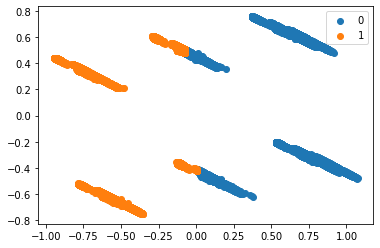

In [11]:
label_cluster = np.unique(label)
for i in label_cluster:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.legend()
plt.show()

## 4. Evaluasi
Sebenarnya, kalau menggunakan dataset real (tanpa label), tidak ada evaluasi yang digunakan. Cukup selesai sama hasil cluster data. Namun karena disini kita memiliki label perbandingan yaitu "Tertarik", maka kita bisa membandingkan nilai hasil cluster dengan nilai original (bukan prediksi)

In [12]:
#Pertama dengan mengubah dataframe original ke 2 dimension PCA agar lebih mudah di visualisasi
df3 = copy.deepcopy(df)
#kita akan melakukan drop label "Tertarik" pada df2
df3.drop(columns="Tertarik", axis=1, inplace=True)
df3.set_index("id")

#Disini saya menggunakan metode preprocessing yang sama sampai ke PCA
replaces_data = {"Kendaraan_Rusak": {"Pernah": 1, "Tidak": 0}}
df3.replace(replaces_data, inplace=True)
df3["Gender"] = encoder.fit_transform(df3[["Jenis_Kelamin"]])
df3["Jenis_Kelamin"] = df3["Gender"]
df3.drop(columns="Gender", axis=1, inplace=True)
replaces_data = {"Umur_Kendaraan": {"1-2 Tahun": 1, "< 1 Tahun": 0, "> 2 Tahun": 2}}
df3.replace(replaces_data, inplace=True)
scaled_values = scaler.fit_transform(df3)
df3.loc[:,:] = scaled_values
df3.head()

id  Jenis_Kelamin  ...  Kanal_Penjualan  Lama_Berlangganan
0  0.000000            1.0  ...         0.932099           0.301038
1  0.000003            0.0  ...         0.172840           0.512111
3  0.000010            1.0  ...         0.759259           0.183391
5  0.000017            0.0  ...         0.932099           0.557093
8  0.000028            1.0  ...         0.981481           0.072664

[5 rows x 11 columns]

In [13]:
pca = PCA(2) #membuat PCA 2 fitur
df3 = pca.fit_transform(df3)
df3

array([[-0.90701509,  0.41921736],
       [ 0.97762619, -0.42389021],
       [-0.03915604,  0.48121372],
       ...,
       [-0.91701655,  0.43128871],
       [-0.52300295, -0.65153879],
       [ 0.86092085, -0.37547447]])

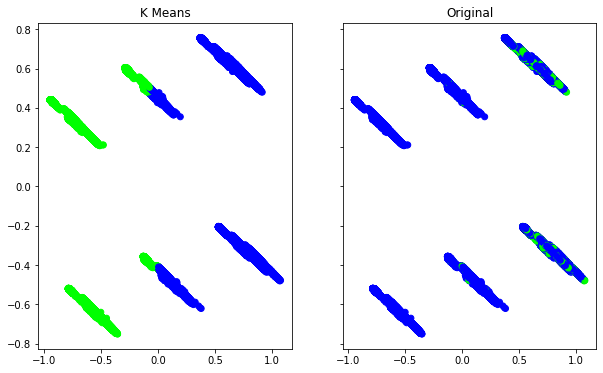

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df2[:,0],df2[:,1],c=label,cmap='brg')
ax2.set_title("Original")
ax2.scatter(df3[:,0],df3[:,1],c=df["Tertarik"],cmap='brg')

Bisa dilihat bahwa terdapat perbedaan yang sangat signifikan antara cluster dengan label "Tertarik". Hal ini disebabkan K-means bukanlah algoritma prediksi dan seharusnya tidak dipergunakan seperti ini.

## 5. Eksperimen

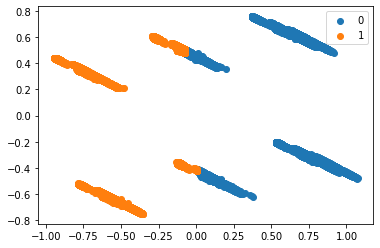

In [15]:
#k = 4, iterasi = 225
label = func_KMeans(df2,2,225)
label_cluster = np.unique(label)
for i in label_cluster:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.legend()
plt.show()

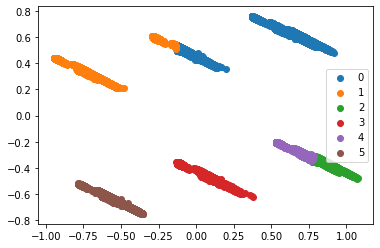

In [16]:
#k = 6, iterasi = 300
label = func_KMeans(df2,6,300)
label_cluster = np.unique(label)
for i in label_cluster:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.legend()
plt.show()

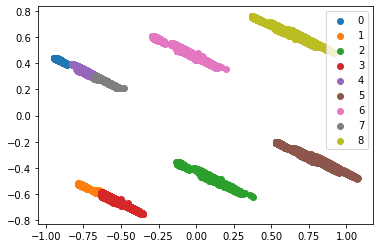

In [17]:
#k = 9, iterasi = 369
label = func_KMeans(df2,9,369)
label_cluster = np.unique(label)
for i in label_cluster:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.legend()
plt.show()

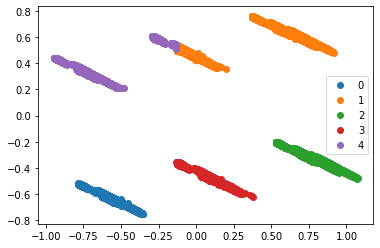

In [18]:
#k = 5, iterasi = 125
label = func_KMeans(df2,5,125)
label_cluster = np.unique(label)
for i in label_cluster:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.legend()
plt.show()

## 6. Kesimpulan
Jadi Kita sudah melihat berbagai jenis hal yang dapat dilakukan. Karena tujuan sebenarnya dari k-means adalah pengelompokkan data, kita bisa melihat hasil clustering ke data. dan tentu saja kita bisa melakukan analisa lebih dalam terhadap data-data yang sudah dipisahkan sesuai clusternya masing-masing.

In [19]:
arr = pd.DataFrame(label)
df["Cluster"] = arr[0] #k = 5

In [20]:
df[df["Cluster"] == 3]

id Jenis_Kelamin  Umur  ...  Lama_Berlangganan  Tertarik  Cluster
47          48        Wanita  44.0  ...              113.0         0      3.0
152        153        Wanita  25.0  ...              205.0         0      3.0
173        174          Pria  24.0  ...               98.0         0      3.0
271        272        Wanita  23.0  ...               13.0         0      3.0
277        278          Pria  60.0  ...               13.0         0      3.0
...        ...           ...   ...  ...                ...       ...      ...
170801  170802          Pria  58.0  ...              121.0         0      3.0
170830  170831          Pria  27.0  ...              103.0         0      3.0
170934  170935        Wanita  22.0  ...              271.0         0      3.0
171028  171029        Wanita  51.0  ...               18.0         0      3.0
171060  171061          Pria  43.0  ...               61.0         0      3.0

[5001 rows x 13 columns]